# Лабораторная работа №3

В рамках данной лабораторной работы вы проведете разведочный анализ данных.

**Требования:**
* Python >= 3.X
* Библиотеки `pandas`, `matplotlib`.

**Входные данные:**
* Файл sales.csv, в котором содержится информация о видеоиграх и их продажах. Каждая игра описана следующими признаками:
    1. `Rank` - рейтинг игры.    
    2. `Name` - название игры.    
    3. `Platform` - платформа (т.е. PC, PS4, и т.д.).    
    4. `Year` - год выпуска игры.    
    5. `Genre` - жанр игры.    
    6. `Publisher` - Publisher of the game.    
    7. `NA_Sales` - объем продаж в северной Америке (млн).    
    8. `EU_Sales` - объем продаж в Европе (млн).    
    9. `JP_Sales` - объем продаж в Японии (млн).    
    10. `Other_Sales` - объем продаж в остальном мире (млн).    
    11. `Global_Sales` - суммарные продажи в мире (млн).

Лабораторную работу необходимо выполнять в данном шаблоне. Результатом работы будет являться файл (с измененным именем), который необходимо выложить в Moodle.

**Важно!!!** Имя файлу задавайте по следующему шаблону **lab_2.1_Группа_ФамилияИО.ipynb**. Например: если Вас зовут Иванов Иван Иванович, и Вы обучаетесь в группе 6207_010302D, то имя файла будет выглядеть так **lab_2.1_6207_010302D_ИвановИИ.ipynb**.

#### Сделайте необходимые импорты:

In [1]:
# вставить код сюда
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

#### Загрузите данные в `pandas.DataFrame` и выведите первые и последние 15 строк.

In [2]:
# вставить код сюда
df = pd.read_csv('sales.csv', sep=',', index_col='Rank')
print(df.head(15))
print(df.tail(15))

                             Name Platform    Year         Genre Publisher  \
Rank                                                                         
1                      Wii Sports      Wii  2006.0        Sports  Nintendo   
2               Super Mario Bros.      NES  1985.0      Platform  Nintendo   
3                  Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
4               Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
5        Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
6                          Tetris       GB  1989.0        Puzzle  Nintendo   
7           New Super Mario Bros.       DS  2006.0      Platform  Nintendo   
8                        Wii Play      Wii  2006.0          Misc  Nintendo   
9       New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo   
10                      Duck Hunt      NES  1984.0       Shooter  Nintendo   
11                     Nintendogs       DS  2005.0    Simulation

#### Проверьте форму (`shape`) данных. Сколько всего объектов в датасете?

In [3]:
# вставить код сюда
print(df.shape)

(16598, 10)


Ответ: <span style="color:red">16598</span>

#### Какие типы имеют каждый из признаков (см. `pandas.DataFrame.info`)?

In [4]:
# вставить код сюда
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


Ответ: <span style="color:red">Name -            object,
Platform   -      object,
Year        -    float64,
Genre        -    object,
Publisher    -    object,
NA_Sales     -   float64,
EU_Sales    -    float64,
JP_Sales    -    float64,
Other_Sales  -   float64,
Global_Sales  -  float64</span>

#### Каковы максимальный и средний объем продаж во всем мире (см. `pandas.DataFrame.describe`)?

In [5]:
# вставить код сюда
df['Global_Sales'].describe()

count    16598.000000
mean         0.537441
std          1.555028
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.740000
Name: Global_Sales, dtype: float64

Ответ: <span style="color:red">max = 82.740000, mean = 0.537441</span>

#### Оцените количество пропусков по каждому из признаков. Для числовых признаков заполните пропуски медианным значением, для прочих признаков удаляйте строки.

In [7]:
# вставить код сюда
# print("Кол-во пропусков:")
# print("Name: ", df.shape[0] - df["Name"].count())
# print("Platform: ", df.shape[0] - df["Platform"].count())
# print("Year: ", df.shape[0] - df["Year"].count())
# print("Genre: ", df.shape[0] - df["Genre"].count())
# print("Publisher: ", df.shape[0] - df["Publisher"].count())
# print("NA_Sales: ", df.shape[0] - df["NA_Sales"].count())
# print("EU_Sales: ", df.shape[0] - df["EU_Sales"].count())
# print("JP_Sales: ", df.shape[0] - df["JP_Sales"].count())
# print("Other_Sales: ", df.shape[0] - df["Other_Sales"].count())
# print("Global_Sales: ", df.shape[0] - df["Global_Sales"].count())

print(df.isnull().sum())

# заполняем пропуски для Year и удаляем строки по Publisher

df_new = df.copy() #
df_new['Year'].fillna(df_new["Year"].median(), inplace=True)
df_new.dropna(subset=['Publisher'], inplace=True)

print(df_new.isnull().sum())

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


#### Постройте круговую диаграмму количества игр в разрезе жанров. Подпишите каждый сектор. Какой жанр самый популярный?

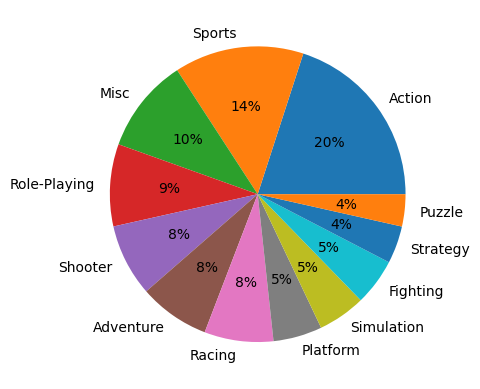

In [8]:
# вставить код сюда
data_for_pie = df_new['Genre'].value_counts()
fig, ax = plt.subplots()
ax.pie(data_for_pie, labels=data_for_pie.index, autopct='%1.0f%%');

Ответ: <span style="color:red">Action</span>

#### Постройте столбчатую диаграмму количества игр в разрезе игровых платформ. Столбцы должны идти в порядке убывания количества игр. Под какую платформу выпустили больше всего игр?

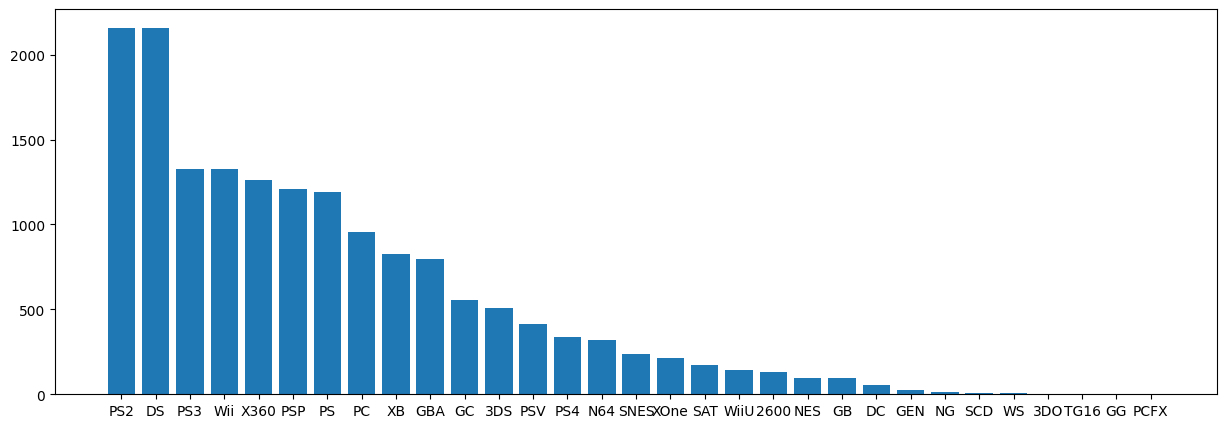

In [9]:
# вставить код сюда
data_for_bar1 = df_new['Platform'].value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(data_for_bar1.index, data_for_bar1);

Ответ: <span style="color:red">PS2</span>

#### Постройте столбчатую диаграмму количества игр по годам. Столбцы должны идти в хронологическом порядке. Какая пятилетка была самой удачной для игростроя?

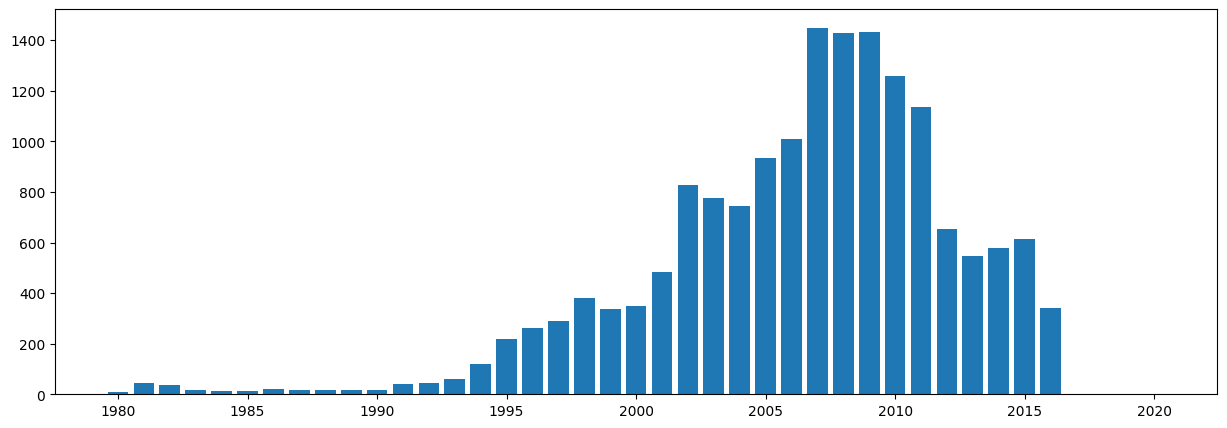

In [10]:
# вставить код сюда
data_for_bar2 = df_new["Year"].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(data_for_bar2.index, data_for_bar2);

Ответ: <span style="color:red">2007-2011</span>

#### Постройте столбчатую диаграмму общих доходов игровой индустрии по годам. Столбцы должны идти в хронологическом порядке. Какой год был самым прибыльным?

<BarContainer object of 39 artists>

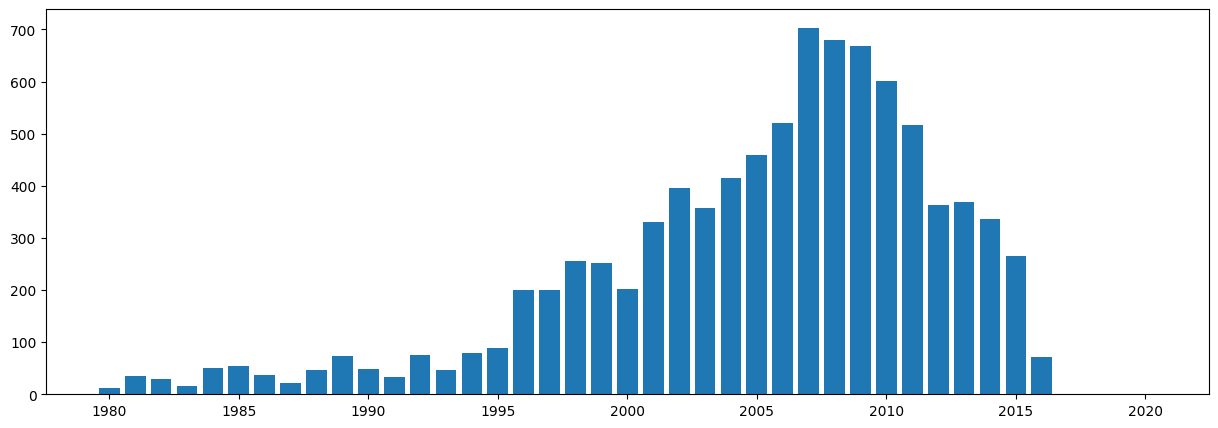

In [11]:
# вставить код сюда
Grouped = df_new.groupby('Year').sum().sort_index()
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(Grouped.index, Grouped['Global_Sales'])

Ответ: <span style="color:red">2007</span>

#### Постройте диаграмму рассеивания между платформами и жанрами. Размер точки соответствует объему продаж. 

Пример:
![gr](img/gr.png)

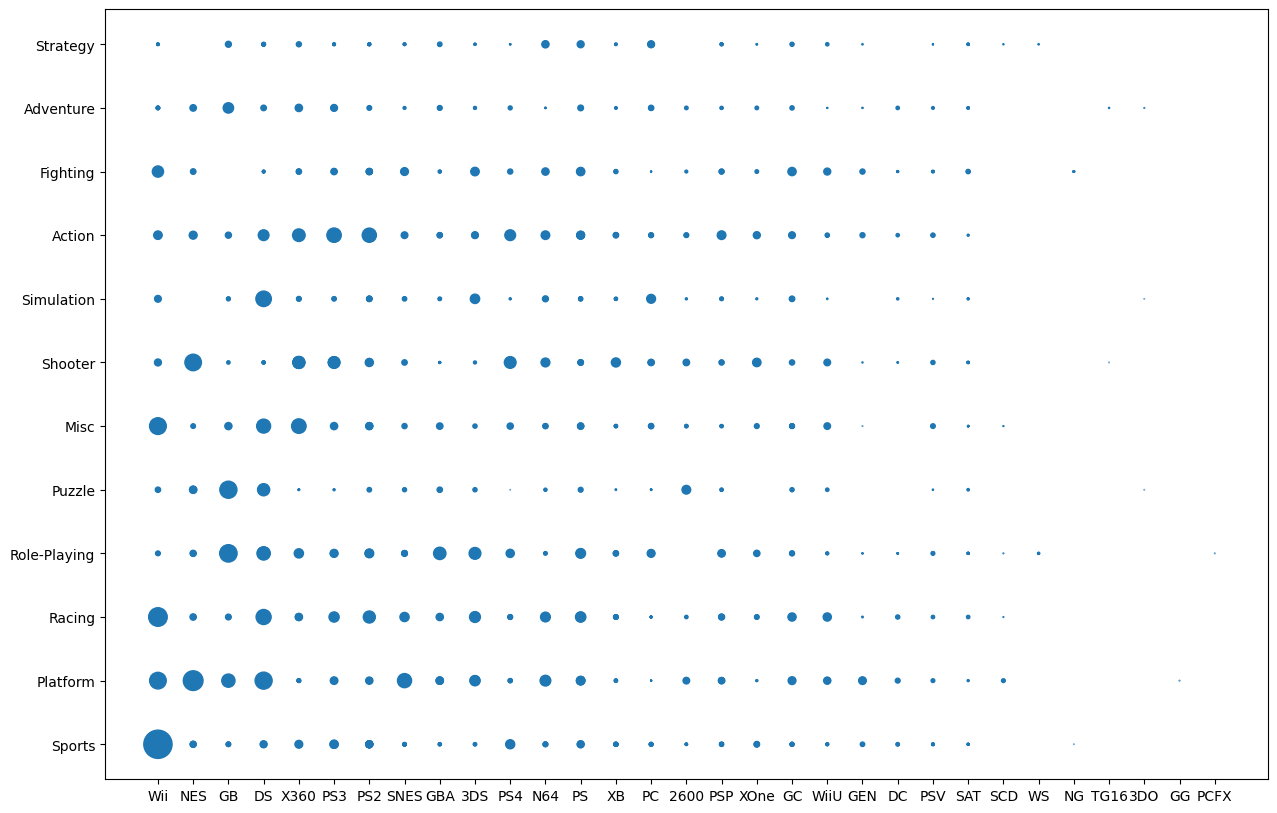

In [21]:
# вставить код сюда
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(df_new["Platform"], df_new['Genre'], s=5*df_new['Global_Sales']);

#### Постройте линейный график объемов продаж шутеров в Японии по годам. Какой год был самым прибыльным?

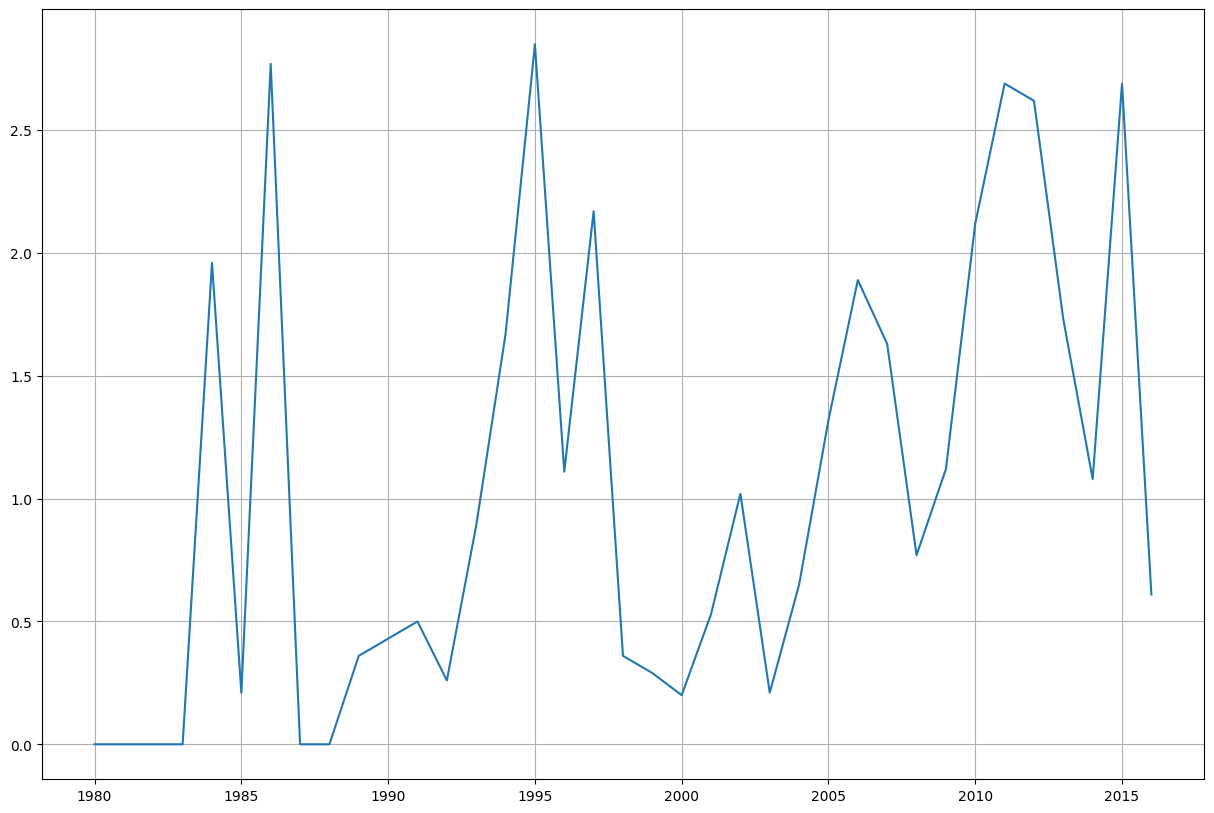

In [16]:
# вставить код сюда
fig, ax = plt.subplots(figsize=(15, 10))
data_for_plot = df_new.query("Genre == 'Shooter'").groupby("Year").sum().sort_index()

ax.plot(data_for_plot.index, data_for_plot['JP_Sales'])
ax.grid()

Ответ: <span style="color:red">1995</span>

#### Какие игры являются самыми старыми?

In [25]:
# вставить код сюда
df_new[df_new['Year'] == df_new['Year'].min()]


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
4027,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.0,0.01,0.49
5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
6319,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00,0.27
6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24


Ответ: <span style="color:red">Asteroids, Missile Command, Kaboom!, Defender, Boxing, Ice Hockey, Freeway, Bridge, Checkers</span>

#### Сколько шутеров было выпущено в 2003 году?

In [29]:
# вставить код сюда
df_new.query("Genre == 'Shooter' & Year == 2003")['Year'].count()

73

Ответ: <span style="color:red">73</span>